<a href="https://colab.research.google.com/github/kaybrian/House_price_prediction_Class_presentation/blob/main/Housing_Price_fastapi_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
# load the data set to see and get some info frm it
data = pd.read_csv('content/house.csv')

In [4]:
# get some head info on the data
data.head()

# get a summary of the data
data.info()

# carry out a more descriptive view of thedata
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
 6   price            4308 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 235.7 KB


bedroom_count      net_sqm  center_distance  metro_distance  \
count    4308.000000  4308.000000      4308.000000     4308.000000   
mean        3.732823   118.941327      1090.544301      105.665358   
std         2.476989    95.469802       555.325830       60.750825   
min         1.000000    10.244518        11.800000        1.245338   
25%         2.000000    52.240659       635.897500       56.156897   
50%         3.000000    91.828201      1143.135000      101.388012   
75%         5.000000   150.987591      1554.280000      148.481068   
max        17.000000   750.971604      1999.840000      330.275317   

             floor          age          price  
count  4308.000000  4308.000000    4308.000000  
mean      9.397168    48.576834   95701.196185  
std       7.517018    27.621465    3919.823988  
min       1.000000     0.000000   86113.592974  
25%       2.000000    25.000000   92934.251436  
50%       8.000000    48.000000   95337.792918  
75%      16.000000    72.000000   97980.675094  
max      24.000000    97.000000  118134.771190

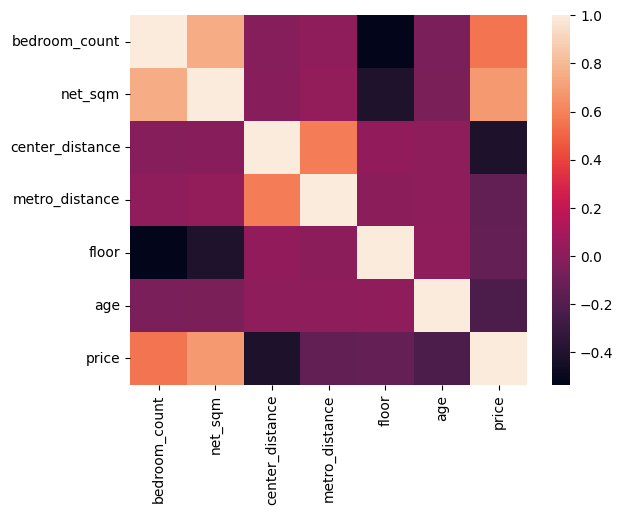

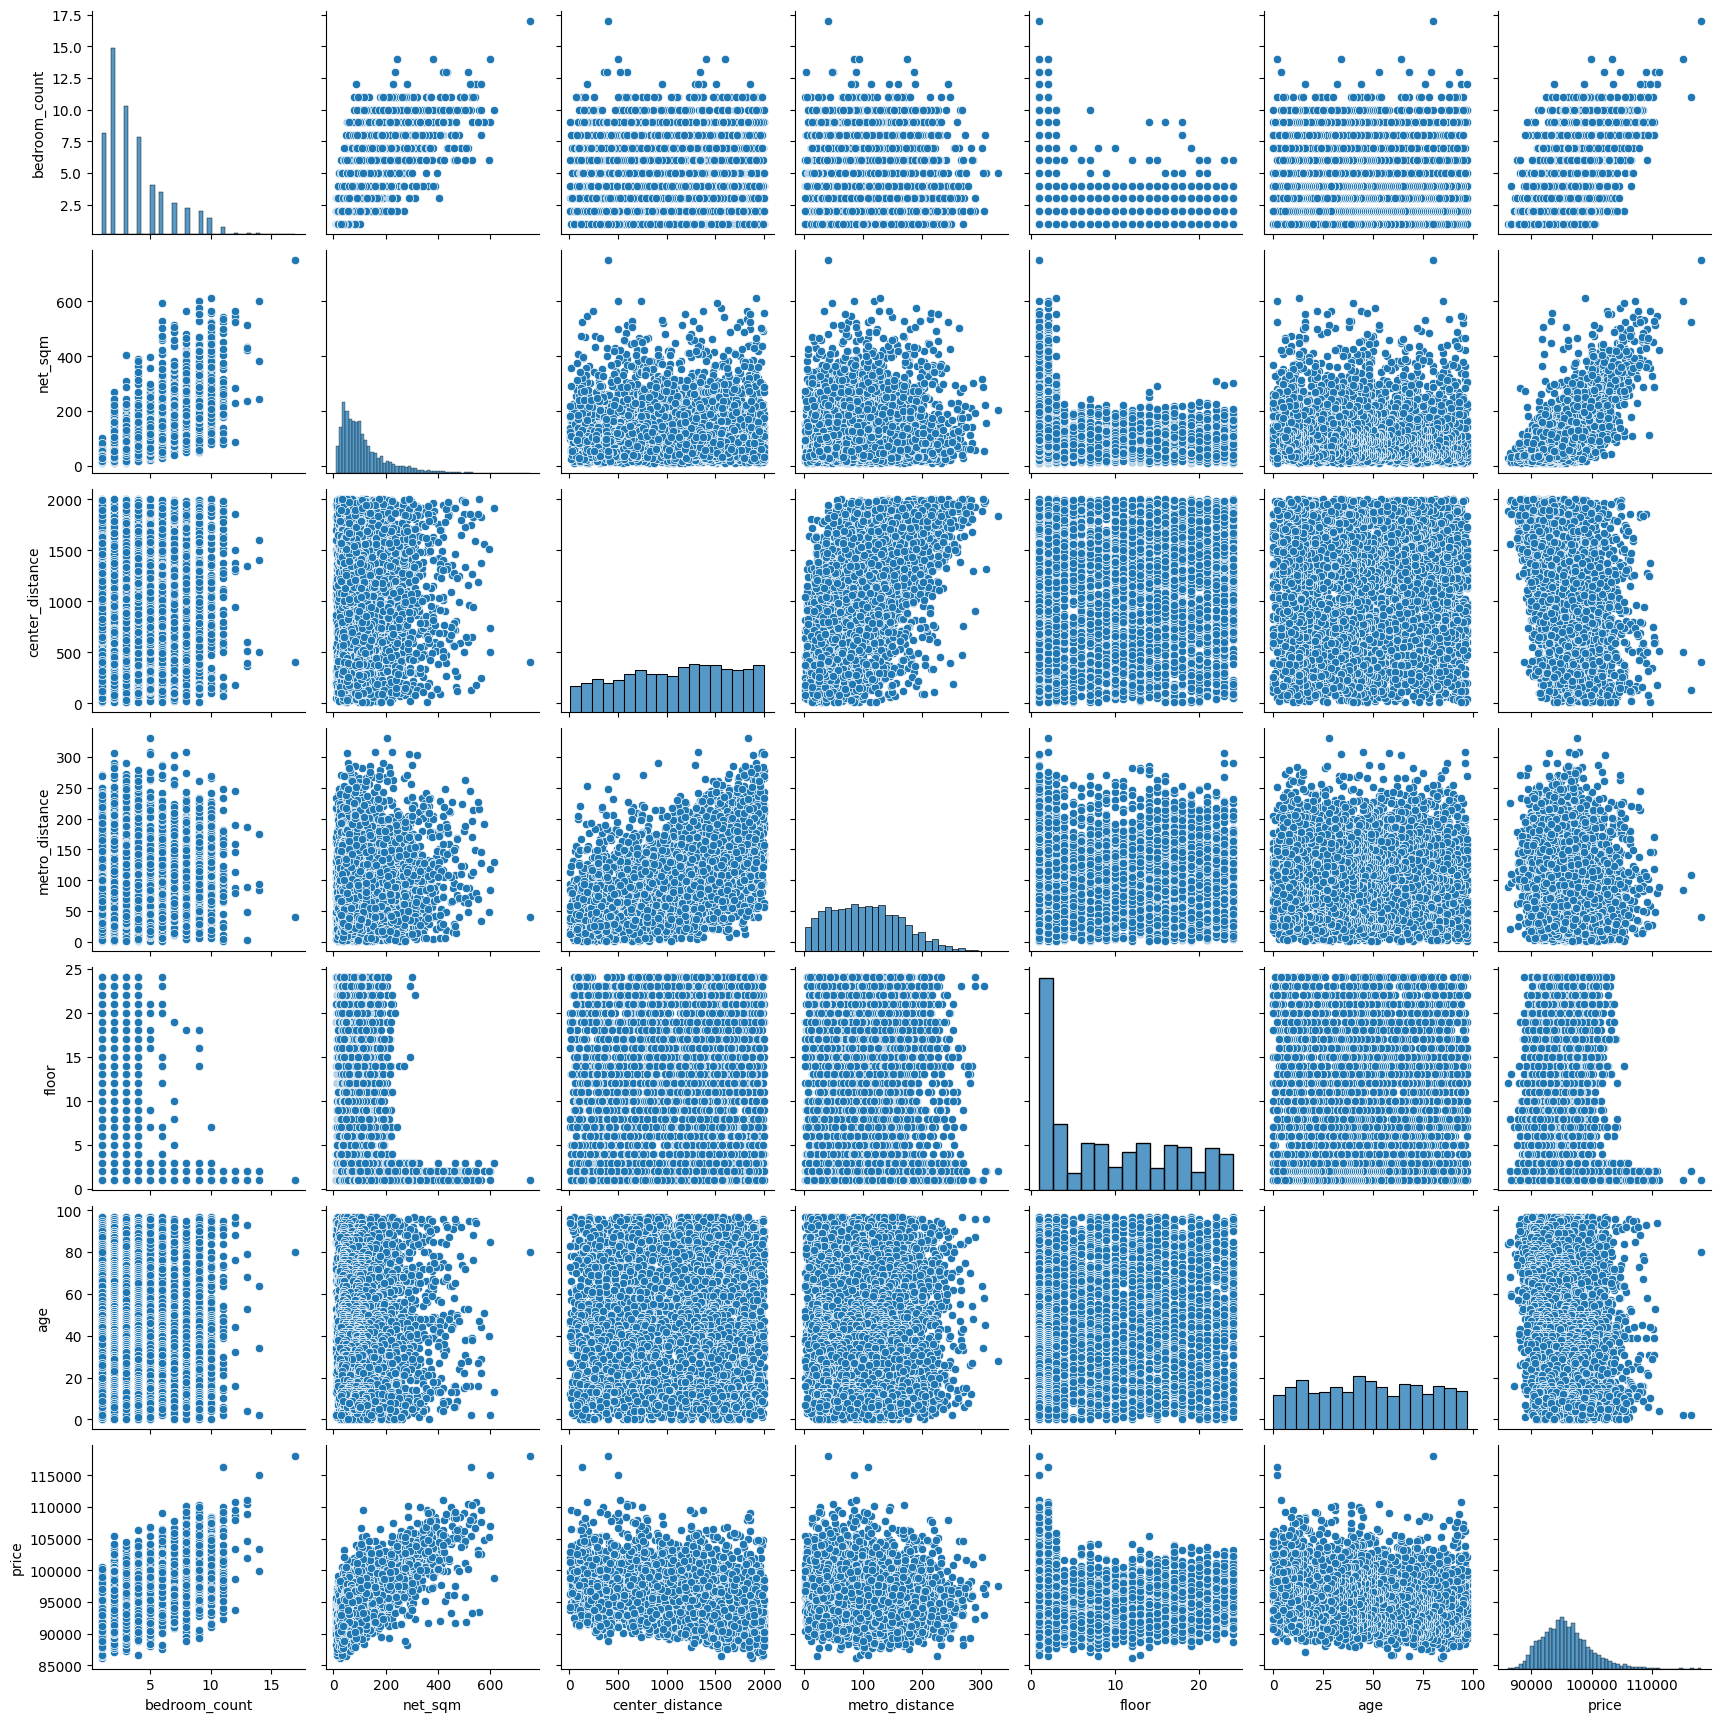

In [5]:
# just draw a head map to show us how the features of the houses correlate
sns.heatmap(data.corr())
# plot a pair plot in sns
sns.pairplot(data)


In [6]:
# extract the x and y values of the data
X = data.iloc[:, :-1]
y = data.iloc[:, -1:]

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4308 entries, 0 to 4307
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedroom_count    4308 non-null   int64  
 1   net_sqm          4308 non-null   float64
 2   center_distance  4308 non-null   float64
 3   metro_distance   4308 non-null   float64
 4   floor            4308 non-null   int64  
 5   age              4308 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 202.1 KB


In [7]:
# split our data in to the training and test data
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Train the regression model
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)


LinearRegression()

In [10]:
# make some Prediction in the model
y_pred = lin_model.predict(X_test)

# plot the pridcted values with the test values
mean_abo_err = mean_absolute_error(y_test, y_pred)
print(mean_abo_err)

# mean error score
mean_error_score = np.sqrt(mean_absolute_error(y_test, y_pred))
print(mean_error_score)


# print the model score to predict the values
print(lin_model.score(X_test, y_test))


1378.687149745079
37.13067666694319
0.7425665047162704


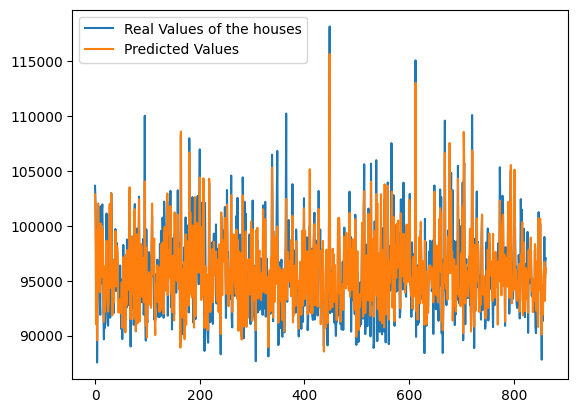

In [11]:
# the values of the y_test_values
y_test_price = y_test.values.flatten()

# plots
plt.plot(y_test_price, label='Real Values of the houses')
plt.plot(y_pred, label='Predicted Values')
plt.legend()
plt.show()

In [12]:
# nake a prediction for one house just
row_index = 20
single_row = X_test.iloc[[row_index]]
new_value = lin_model.predict(single_row)
print(single_row)

# first prediction of one house
print("another value", new_value)


# Alternatively, if you want to make a
another_value = lin_model.predict([[5, 40.8765, 1200.89, 29.093456, 3, 89]])

print("Price of the hosue:", f'{another_value[0][0]:.2f} dollars')



      bedroom_count     net_sqm  center_distance  metro_distance  floor  age
3585              2  111.217359           472.66       30.045741     15   89
another value [[96072.05387579]]
Price of the hosue: 91371.99 dollars


/home/it/ALU/summartive/Housing Price Prdiction/env/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [16]:
import asyncio
import uvicorn
from typing import Annotated
from fastapi import FastAPI, Depends, HTTPException, status, Path
from pydantic import BaseModel, Field

app = FastAPI()

class HouseRequest(BaseModel):
    bedroom_count: int = Field(gt=0, lt=100)
    net_sqm: int = Field(gt=0, lt=10000)
    center_distance: int = Field(gt=0, lt=10000)
    metro_distance: int = Field(gt=0, lt=10000)
    floor: int = Field(gt=0, lt=500)
    age: int = Field(gt=0, lt=500)
    

 

@app.get("/")
async def get_hello():
    return {"hello": "world"}



if __name__ == "__main__":
    config = uvicorn.Config(app)
    server = uvicorn.Server(config)
    await server.serve()

INFO:     Started server process [2397]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:34526 - "GET / HTTP/1.1" 200 OK
INFO:     127.0.0.1:52078 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:52078 - "GET /openapi.json HTTP/1.1" 200 OK
INFO:     127.0.0.1:52078 - "GET / HTTP/1.1" 200 OK


INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [2397]
